### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
 
 
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with lower lead scores have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


### Goals of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### The steps are broadlly: 

#### Business understanding: 
- Data understanding: 
- Data importing: 
- Data Cleaning: 
- Handle the “Select” level that is present in many of the categorical variables. 
- Drop columns that are having a high percentage of missing values. Check all the columns before dropping them.
- Check the number of unique categories in each categorical column. Here you may need to do something.
- For the columns with less percentage of missing, use some imputation technique. 
- Finally check the percentage of rows retained in the data cleaning process. Prepare the data for Model Building: 
- EDA 
- Create dummies for all categorical columns. • Perform train-test split. • Perform scaling.

#### Model Building: 
- Use techniques like RFE to perform variable selection. 
- Build a Logistic Regression model with good sensitivity.
- Check p-value and VIF. 
- Find the optimal probability cutoff.
- Check the model performance over the test data. 
- Generate the score variable. 

#### Model Evaluation:
- All performance metrics metrics, f score Making Predictions on the Test Set:-

###  Reading and Understanding the Data
Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
#importing dataset to csv

Uploaded_data_backup=pd.read_csv("Leads.csv")

leads=pd.read_csv("Leads.csv")

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


lets inspect the variaous aspects of our datafram

In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Numeric Variable check
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Converting all the values to lower case
leads = leads.applymap(lambda s:s.lower() if type(s) == str else s)

This will convert all the values in thelower case which will help while analysing the data

## EXPLORATORY DATA ANALYSIS

### Data Cleaning & Treatment

In [7]:
#Check some col. values randomly to understand the values in it 
# For City:

leads["City"].value_counts(normalize=True)*100

mumbai                         41.202046
select                         28.759591
thane & outskirts               9.616368
other cities                    8.772379
other cities of maharashtra     5.843990
other metro cities              4.859335
tier ii cities                  0.946292
Name: City, dtype: float64

In [8]:
#Specialization:
leads["Specialization"].value_counts(normalize=True)*100

select                               24.891054
finance management                   12.509613
human resource management            10.869008
marketing management                 10.740836
operations management                 6.447065
business administration               5.165342
it projects management                4.691105
supply chain management               4.473212
banking, investment and insurance     4.332223
travel and tourism                    2.601897
media and advertising                 2.601897
international business                2.281466
healthcare management                 2.037939
hospitality management                1.461164
e-commerce                            1.435529
retail management                     1.281723
rural and agribusiness                0.935658
e-business                            0.730582
services excellence                   0.512689
Name: Specialization, dtype: float64

From the above we can see that there is some values showing as select but we don't need those values with select
- We need to replace the values from select to nan to having the null values in place of select 

In [9]:
# Replacing 'Select' with NaN

leads = leads.replace('select', np.nan)

#### NULL Value Check 

In [10]:
#checking null values in each col.

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Here we can see that some of the col. are having null value percentage more than the 45%.

We should remove those col. which are having null values more than 45%

In [12]:
#drop the cols with more than 45% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 40):
        leads.drop(i, 1, inplace = True)

In [13]:
# Again check null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

It seems we have done the removal of the col. which are having more than 45% data missing as shown above 

In [14]:
# Check the shape of the data 
leads.shape

(9240, 30)

In [15]:
# Rows having null values 
round(leads.isnull().sum(axis=1)/leads.shape[1]*100,2)

0       10.00
1        6.67
2        0.00
3        0.00
4        3.33
        ...  
9235     0.00
9236     0.00
9237     0.00
9238    10.00
9239     0.00
Length: 9240, dtype: float64

We have seen from the above that rows are also having some data missing. If there is any row which is having missing data more than 70% we should remove because we can not extract anything from those rows.

In [16]:
# Drop rows which are having more than 70% data missing
leads.dropna(thresh=8, inplace= True )

In [17]:
leads.shape

(9240, 30)

here we can see no row has been dropped so there is no rows which are having more than 70% data missing.

###### Now we can see that there are more col. which are having high missing values so we need to analyse them seperately

In [18]:
# Country 
#checking value counts of Country column

leads['Country'].value_counts(normalize=True)*100

india                   95.766337
united states            1.017849
united arab emirates     0.781826
singapore                0.354035
saudi arabia             0.309780
united kingdom           0.221272
australia                0.191769
qatar                    0.147514
hong kong                0.103260
bahrain                  0.103260
oman                     0.088509
france                   0.088509
unknown                  0.073757
south africa             0.059006
nigeria                  0.059006
germany                  0.059006
kuwait                   0.059006
canada                   0.059006
sweden                   0.044254
china                    0.029503
asia/pacific region      0.029503
uganda                   0.029503
bangladesh               0.029503
italy                    0.029503
belgium                  0.029503
netherlands              0.029503
ghana                    0.029503
philippines              0.029503
russia                   0.014751
switzerland   

In [19]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India
leads['Country'] = leads['Country'].replace(np.nan,'india')

In [20]:
leads['Country'].value_counts(normalize=True)*100

india                   96.893939
united states            0.746753
united arab emirates     0.573593
singapore                0.259740
saudi arabia             0.227273
united kingdom           0.162338
australia                0.140693
qatar                    0.108225
hong kong                0.075758
bahrain                  0.075758
oman                     0.064935
france                   0.064935
unknown                  0.054113
south africa             0.043290
nigeria                  0.043290
germany                  0.043290
kuwait                   0.043290
canada                   0.043290
sweden                   0.032468
china                    0.021645
asia/pacific region      0.021645
uganda                   0.021645
bangladesh               0.021645
italy                    0.021645
belgium                  0.021645
netherlands              0.021645
ghana                    0.021645
philippines              0.021645
russia                   0.010823
switzerland   

As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [21]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [22]:
#checking value counts of "City" column

leads['City'].value_counts(normalize=True)*100

mumbai                         57.835218
thane & outskirts              13.498474
other cities                   12.313768
other cities of maharashtra     8.203195
other metro cities              6.821038
tier ii cities                  1.328307
Name: City, dtype: float64

From the above we can see that most of the students are from Mumbai so we can impute the null values with Mumbai

In [23]:
leads['City'] = leads['City'].replace(np.nan,'mumbai')

In [24]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(normalize=True)*100

finance management                   16.655290
human resource management            14.470990
marketing management                 14.300341
operations management                 8.583618
business administration               6.877133
it projects management                6.245734
supply chain management               5.955631
banking, investment and insurance     5.767918
travel and tourism                    3.464164
media and advertising                 3.464164
international business                3.037543
healthcare management                 2.713311
hospitality management                1.945392
e-commerce                            1.911263
retail management                     1.706485
rural and agribusiness                1.245734
e-business                            0.972696
services excellence                   0.682594
Name: Specialization, dtype: float64

Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
who don't have a specialization yet. So we will replace NaN values here with 'Not Specified'



In [25]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'not Specified')

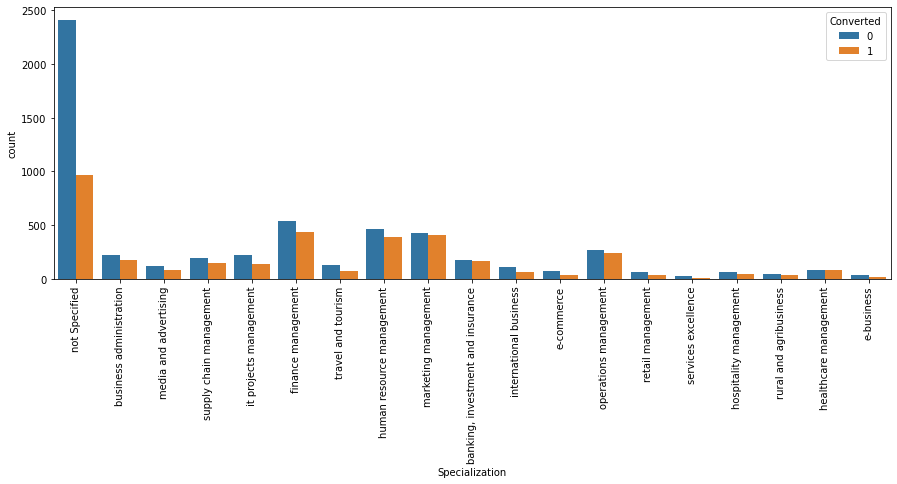

In [26]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [27]:
# combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['finance management','human Resource management',
                                                           'marketing Management','operations management',
                                                           'it projects management','supply chain management',
                                                    'healthcare management','hospitality management',
                                                           'retail management'] ,'management_specializations')  


In [28]:
leads['Specialization'] = leads['Specialization'].replace(['international business','e-commerce',
                                                           'rural and agribusiness','services excellence','e-business',
                                                           ] ,'business_services_specializations')  

In [29]:
leads['Specialization'].value_counts(normalize=True)*100

not Specified                        36.580087
management_specializations           27.781385
human resource management             9.177489
marketing management                  9.069264
business_services_specializations     4.978355
business administration               4.361472
banking, investment and insurance     3.658009
media and advertising                 2.196970
travel and tourism                    2.196970
Name: Specialization, dtype: float64

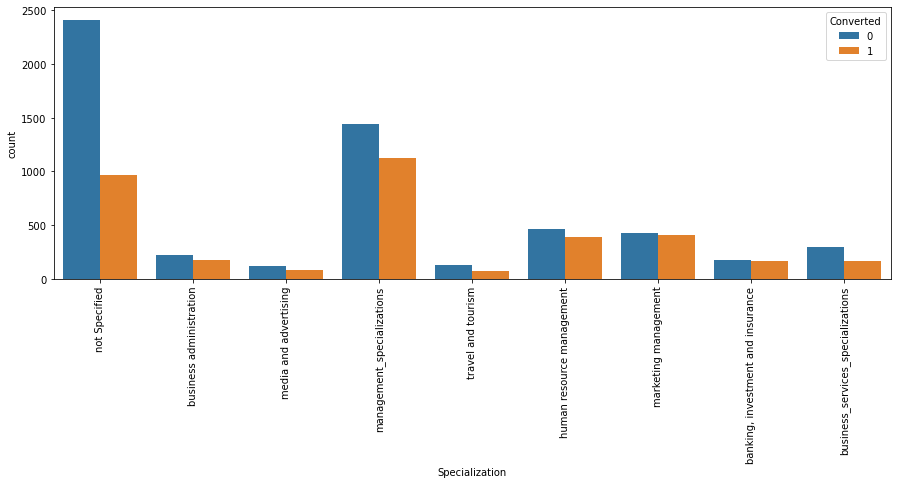

In [30]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [31]:
#What is your current occupation

leads['What is your current occupation'].value_counts(normalize=True)*100

unemployed              85.496183
working professional    10.778626
student                  3.206107
other                    0.244275
housewife                0.152672
businessman              0.122137
Name: What is your current occupation, dtype: float64

In [32]:
#imputing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'unemployed')

As we can see from the above that this filed is highly skewed so we are combining the values into one which are verly low count

In [33]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['housewife','businessman',
                                                            ] ,'other')  

In [34]:
#checking count of values
leads['What is your current occupation'].value_counts(normalize=True)*100

unemployed              89.718615
working professional     7.640693
student                  2.272727
other                    0.367965
Name: What is your current occupation, dtype: float64

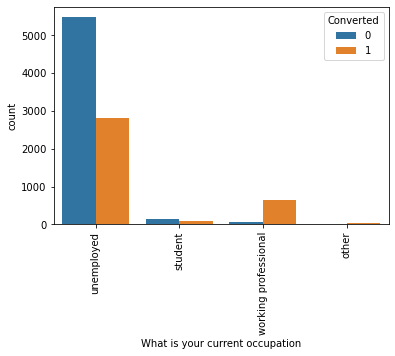

In [35]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show() 

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in terms of Absolute numbers.

In [36]:
#checking value counts What matters most to you in choosing a course
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

better career prospects      99.954065
flexibility & convenience     0.030623
other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [37]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'better career prospects')

In [38]:
#checking value counts
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

better career prospects      99.967532
flexibility & convenience     0.021645
other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [39]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [40]:
#checking value counts of Tag variable

leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [41]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'not specified')

In [42]:
#clubing the low % values as others

leads['Tags'] = leads['Tags'].replace(['switched off','busy','lost to eins','not doing further education','interested  in full time mba','graduation in progress','invalid number','diploma holder (not eligible)','wrong number given','opp hangup','number not provided ','number not provided','in touch with eins','lost to others','still thinking','want to take admission but has financial problems','in confusion whether part time or dlp',
                                                                                             'interested in next batch','lateral student','shall take in the next coming month','university not recognized ',
                                                                                             'recognition issue (dec approval)','university not recognized'] ,'other') 

In [43]:
leads['Tags'].value_counts(normalize=True)*100

not specified                          36.287879
will revert after reading the email    22.424242
other                                  13.809524
ringing                                13.019481
interested in other courses             5.551948
already a student                       5.032468
closed by horizzon                      3.874459
Name: Tags, dtype: float64

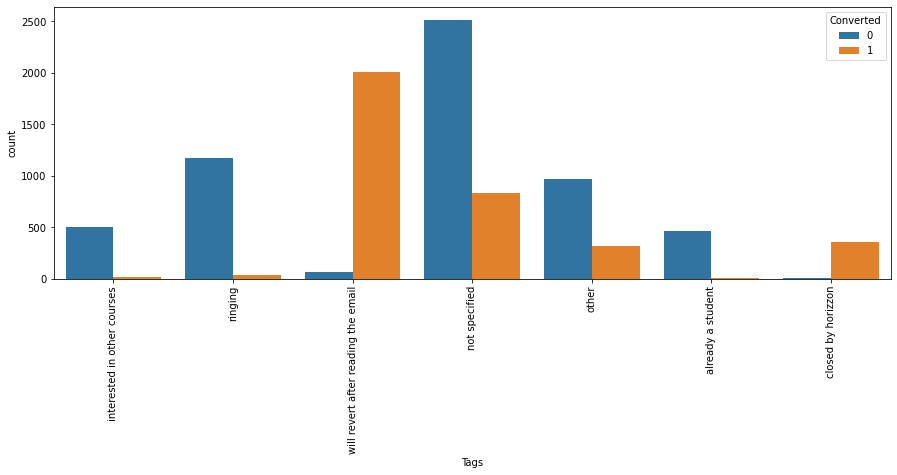

In [44]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

From the above we can clearly see that the conversion rate is more with those who will revet after reading the mail

In [45]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [46]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
NaN                    36
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
youtubechannel          1
testone                 1
pay per click ads       1
welearnblog_home        1
welearn                 1
blog                    1
nc_edm                  1
Name: Lead Source, dtype: int64

In [47]:
# replacing Nan Values and combining low frequency values 
# We can group some of the lower frequency occuring labels under a common label 'Others'

leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'others')
     

In [48]:
leads['Lead Source'] = leads['Lead Source'].replace('google','google')
leads['Lead Source'] = leads['Lead Source'].replace('facebook','social media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','click2call','press_release',
                                                     'youtubechannel','welearnblog_home',
                                                     'weLearn','blog','pay per click ads',
                                                    'testone','nc_edm','live chat','social media','welearn','referral sites','welingak website'] ,'others') 


In [49]:
# Again check the Values
leads['Lead Source'].value_counts(normalize=True)*100

google            31.093074
direct traffic    27.521645
olark chat        18.993506
organic search    12.489177
reference          5.779221
others             4.123377
Name: Lead Source, dtype: float64

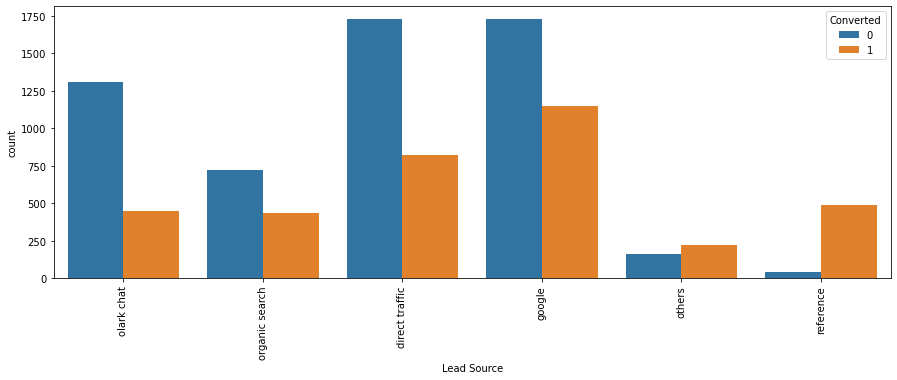

In [50]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference Maximum number of leads are generated by Google and Direct traffic. Conversion Rate of reference leads and leads through welingak website is high. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [51]:
# Last Activity:
leads['Last Activity'].value_counts(dropna=False)

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
NaN                              103
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [52]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'others')
leads['Last Activity'] = leads['Last Activity'].replace(['unreachable','unsubscribed',
                                                        'had a phone conversation', 
                                                        'approached upfront',
                                                        'view in browser link clicked',       
                                                        'email marked spam',                  
                                                        'email received','resubscribed to emails',
                                                         'visited booth in tradeshow','email link clicked','form submitted on website'],'others')

In [53]:
# Last Activity:
leads['Last Activity'].value_counts(normalize=True)*100

email opened               37.196970
sms sent                   29.707792
olark chat conversation    10.530303
others                      7.478355
page visited on website     6.926407
converted to lead           4.632035
email bounced               3.528139
Name: Last Activity, dtype: float64

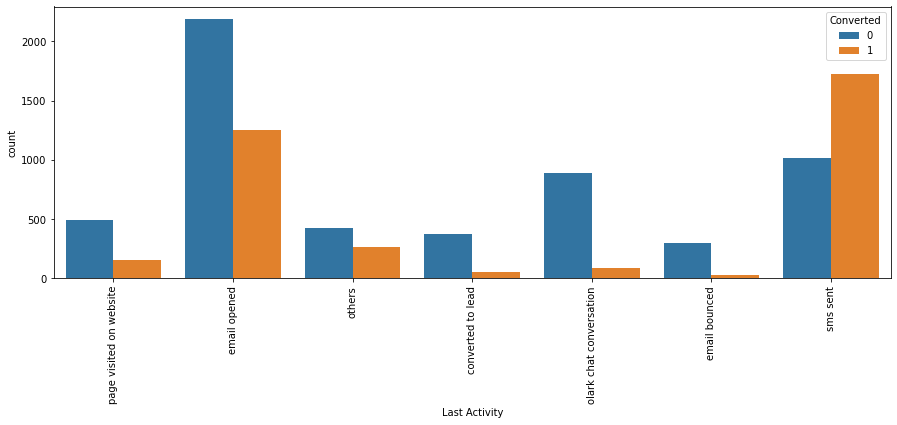

In [54]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Last Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [55]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [56]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [57]:
#Checking percentage of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

Here we can see we have handled the missing value well

<AxesSubplot:>

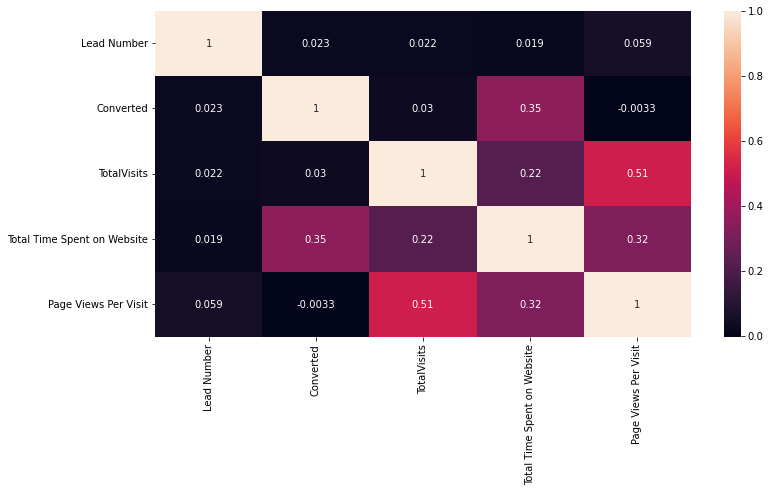

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(leads.corr(),annot=True)

In [59]:
#Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

landing page submission    4886
api                        3578
lead add form               608
lead import                  31
Name: Lead Origin, dtype: int64

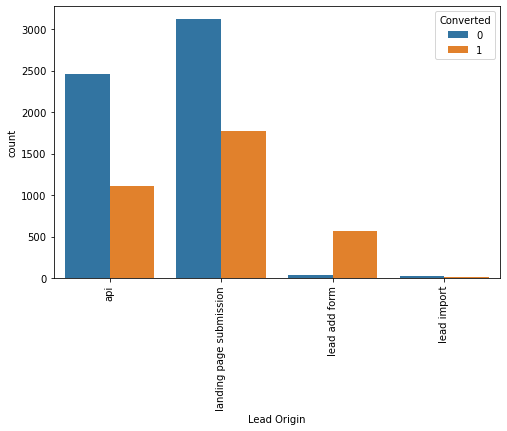

In [60]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### Inference :
- Here we can see API and Landing page have higer no of conversion rate. 
- Lead Add Form has a very high conversion rate but count of leads are very low. 
- Lead Import a get very few leads. 

To improve overall lead conversion rate we should improve API & Landing Page conversion rate because the no of leads are very high that the other sources.


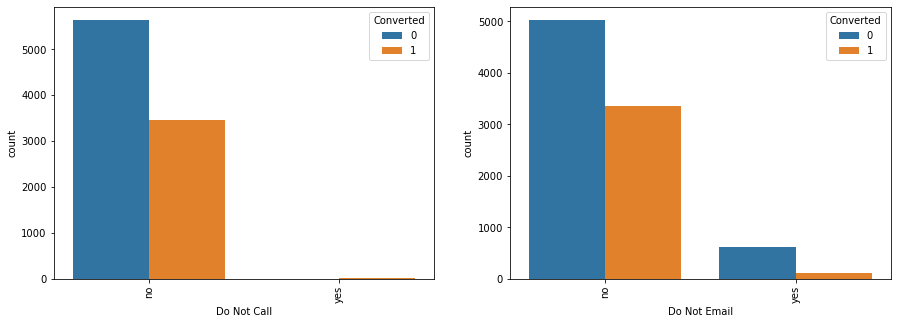

In [61]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [62]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

no     9101
yes       2
Name: Do Not Call, dtype: int64

In [63]:
leads['Do Not Call'].value_counts(normalize=True)*100

no     99.978029
yes     0.021971
Name: Do Not Call, dtype: float64

In [64]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

no     8379
yes     724
Name: Do Not Email, dtype: int64

We Can append the Do Not Call & Do Not Email Column to the list of Columns to be Dropped since > 90% is of only one Value

In [65]:
cols_to_drop.append('Do Not Call')



cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [66]:
cols_to_drop.append('Do Not Email')
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Do Not Email']

###### IMBALANCED VARIABLES THAT CAN BE DROPPED

In [67]:
leads.Search.value_counts(normalize=True)*100

no     99.846205
yes     0.153795
Name: Search, dtype: float64

In [68]:
leads.Magazine.value_counts(normalize=True)*100

no    100.0
Name: Magazine, dtype: float64

In [69]:
leads['Newspaper Article'].value_counts(normalize=True)*100

no     99.978029
yes     0.021971
Name: Newspaper Article, dtype: float64

In [70]:
leads['X Education Forums'].value_counts(normalize=True)*100

no     99.989015
yes     0.010985
Name: X Education Forums, dtype: float64

In [71]:
leads['Newspaper'].value_counts(normalize=True)*100

no     99.989015
yes     0.010985
Name: Newspaper, dtype: float64

In [72]:
leads['Digital Advertisement'].value_counts(normalize=True)*100

no     99.956058
yes     0.043942
Name: Digital Advertisement, dtype: float64

In [73]:
leads['Through Recommendations'].value_counts(normalize=True)*100

no     99.923102
yes     0.076898
Name: Through Recommendations, dtype: float64

In [74]:
leads['Receive More Updates About Our Courses'].value_counts(normalize=True)*100

no    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [75]:
leads['Update me on Supply Chain Content'].value_counts(normalize=True)*100

no    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [76]:
leads['Get updates on DM Content'].value_counts(normalize=True)*100

no    100.0
Name: Get updates on DM Content, dtype: float64

In [77]:
leads['I agree to pay the amount through cheque'].value_counts(normalize=True)*100

no    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [78]:
leads['A free copy of Mastering The Interview'].value_counts(normalize=True)*100

no     68.274195
yes    31.725805
Name: A free copy of Mastering The Interview, dtype: float64

In [79]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [80]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts(normalize=True)*100

modified                        35.922223
email opened                    31.055696
sms sent                        23.860266
page visited on website          3.493354
olark chat conversation          2.010326
email link clicked               1.900472
email bounced                    0.659123
unsubscribed                     0.516313
unreachable                      0.351532
had a phone conversation         0.153795
email marked spam                0.021971
approached upfront               0.010985
resubscribed to emails           0.010985
view in browser link clicked     0.010985
form submitted on website        0.010985
email received                   0.010985
Name: Last Notable Activity, dtype: float64

In [81]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['olark chat conversation','had a phone conversation',
                                                                       'email marked spam',
                                                                         'unreachable',
                                                                         'unsubscribed',
                                                                         'email bounced',                                                                    
                                                                       'resubscribed to emails',
                                                                       'view in browser link clicked',
                                                                       'approached upfront', 
                                                                       'form submitted on website', 
                                                                       'email received','email link clicked'
                                                                        ],'other_notable_activity')

In [82]:
# Check the value counts 
leads['Last Notable Activity'].value_counts(normalize=True)*100

modified                   35.922223
email opened               31.055696
sms sent                   23.860266
other_notable_activity      5.668461
page visited on website     3.493354
Name: Last Notable Activity, dtype: float64

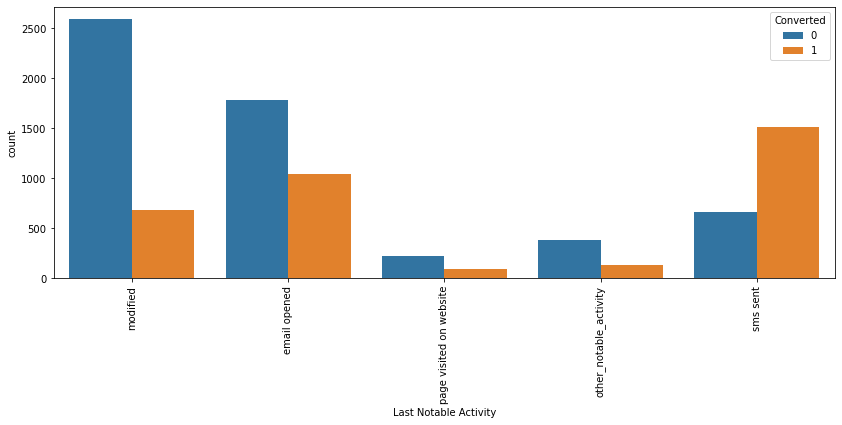

In [83]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [84]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

#### Numerical Variable

In [85]:
leads['Converted'].value_counts(normalize=True)*100

0    61.979567
1    38.020433
Name: Converted, dtype: float64

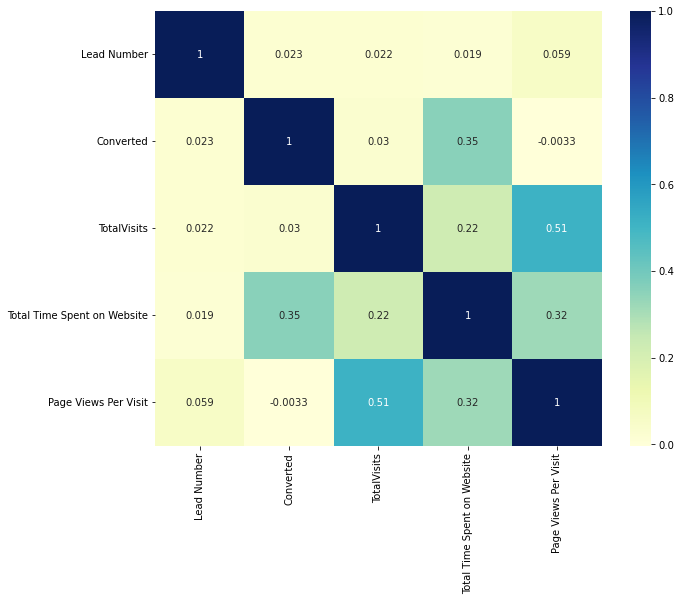

In [86]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

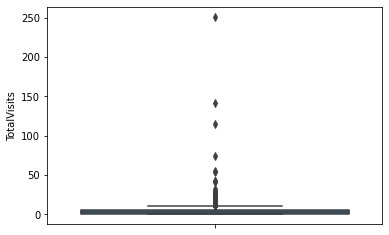

In [87]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [88]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

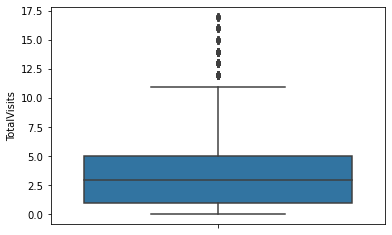

In [89]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [90]:
leads.shape

(9020, 30)

Check for the Next Numerical Column:

In [91]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

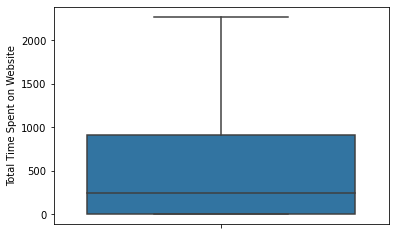

In [92]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

As there are no outliner present in the variable so no need to do any outliner treatment



In [93]:
#checking spread of "Page Views Per Visit"

leads['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

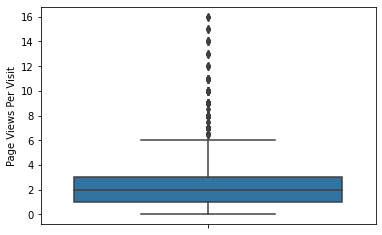

In [94]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

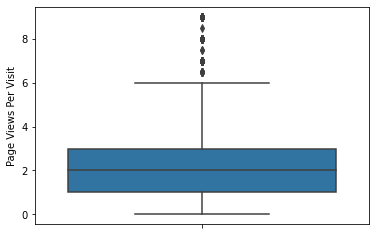

In [95]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [96]:
leads.shape

(8953, 30)

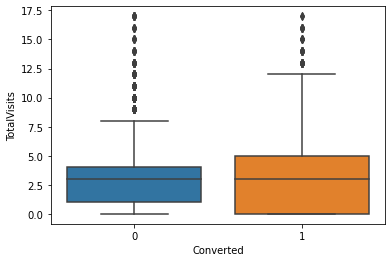

In [97]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

##### Inference:

- Median for converted and not converted leads are very close. No conclusion from the total visit variable 

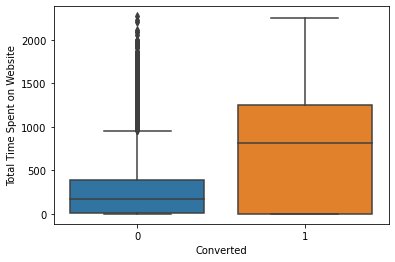

In [98]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

##### Inference;


The leads which are spendign more time on website are more likely to be converted. From this we can learn that website should be more attractive and engaging so that leads will spend good amount of time here and this will help to convert more leads through the platform



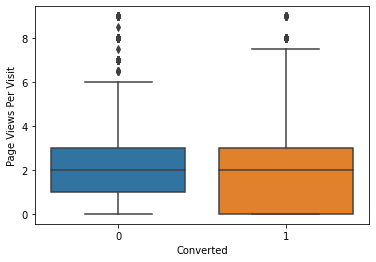

In [99]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

In [100]:
#dropping columns
leads = leads.drop(cols_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8953 non-null   object 
 1   Lead Number                             8953 non-null   int64  
 2   Lead Origin                             8953 non-null   object 
 3   Lead Source                             8953 non-null   object 
 4   Converted                               8953 non-null   int64  
 5   TotalVisits                             8953 non-null   float64
 6   Total Time Spent on Website             8953 non-null   int64  
 7   Page Views Per Visit                    8953 non-null   float64
 8   Last Activity                           8953 non-null   object 
 9   Specialization                          8953 non-null   object 
 10  What is your current occupation         8953 non-null   obje

In [101]:
#check for duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0


True

In [102]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)


Prospect ID & Lead Number are two variables which are just indicative of the unique id no to the People whome contacted & can be dropped.

In [103]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Converted                               8953 non-null   int64  
 3   TotalVisits                             8953 non-null   float64
 4   Total Time Spent on Website             8953 non-null   int64  
 5   Page Views Per Visit                    8953 non-null   float64
 6   Last Activity                           8953 non-null   object 
 7   Specialization                          8953 non-null   object 
 8   What is your current occupation         8953 non-null   object 
 9   Tags                                    8953 non-null   object 
 10  City                                    8953 non-null   obje

These  coloums are added by the sale team on origenal captured data 
'last activity ', 'last notable activity', 'lead profile', 'tags', 'lead quality','Asymmetrique Activity Index               
 'Asymmetrique Profile Index'                      
 'Asymmetrique Activity Score'                 
 'Asymmetrique Profile Score'
As we are aware we have to train the model on orignal data , becouse same will benuse to infere the lead quality.

In [104]:
#Removing the after sale coloums 

leads.drop(['Last Activity','Last Notable Activity', 'Tags'], 1, inplace = True)

###### Inference:

- Median is same for the converted & Non converted.

- We can not say anything on the basis of the above point 


In [105]:
#checking missing values in leftover columns/

round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
dtype: float64

<Figure size 800x640 with 0 Axes>

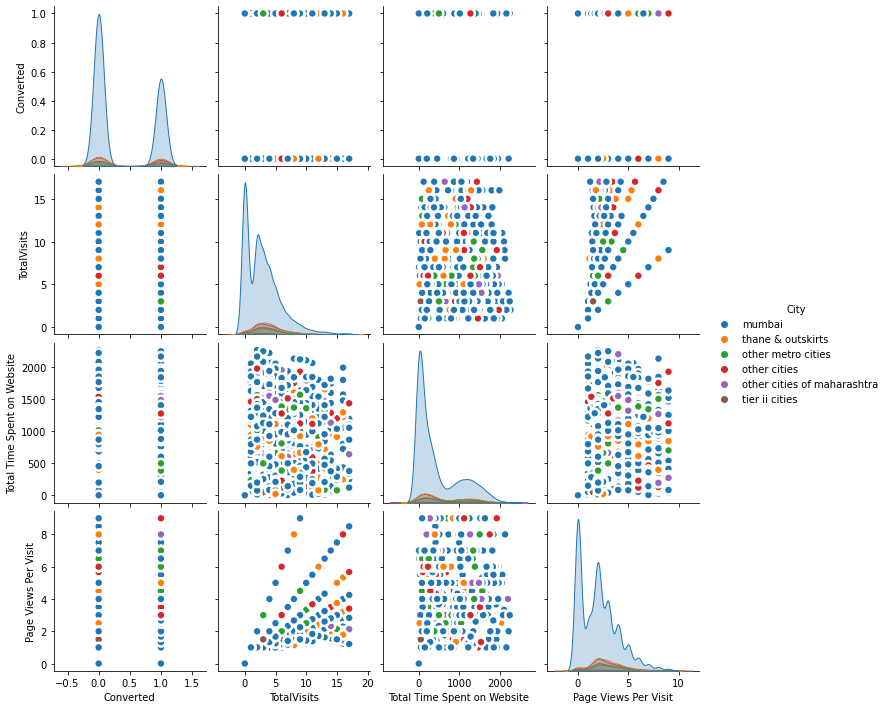

In [106]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(leads, kind="scatter", hue="City", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

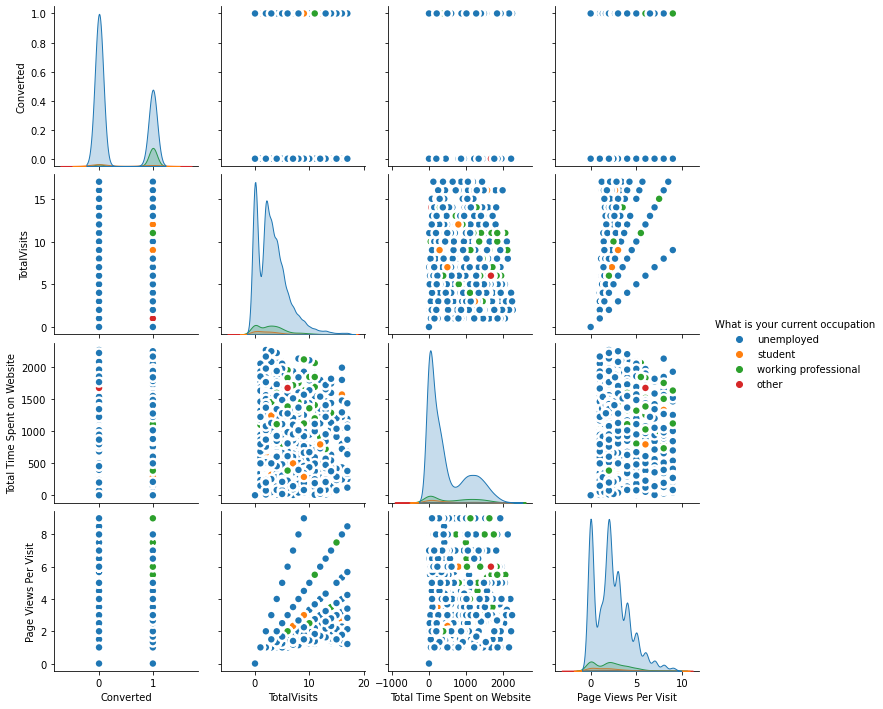

In [107]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(leads, kind="scatter", hue="What is your current occupation", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

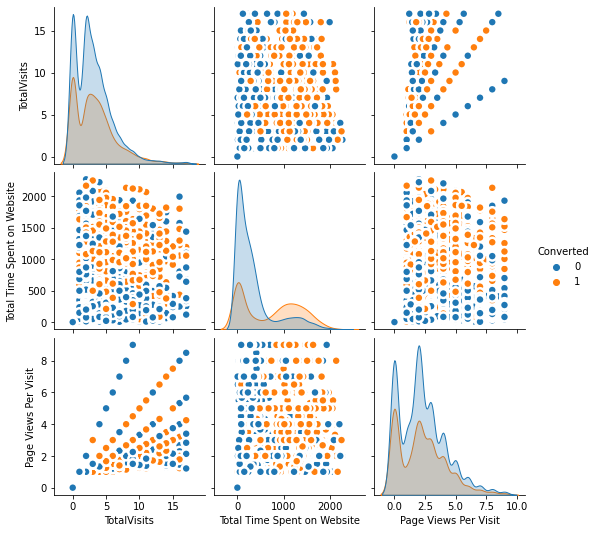

In [108]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(leads, kind="scatter", hue="Converted", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<AxesSubplot:>

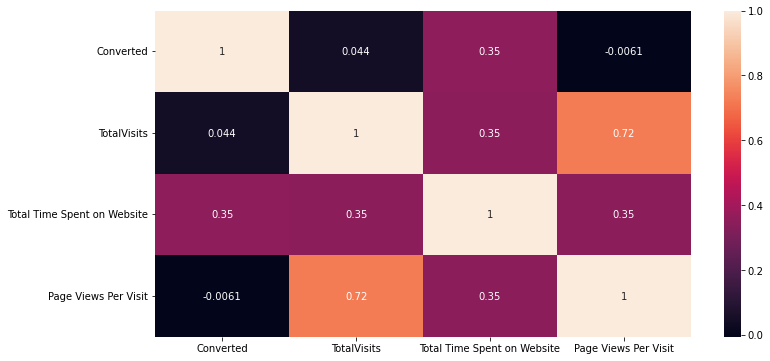

In [109]:
plt.figure(figsize=(12,6))
sns.heatmap(leads.corr(),annot=True)

Here we can see the correlation matrix

In [110]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Converted                               8953 non-null   int64  
 3   TotalVisits                             8953 non-null   float64
 4   Total Time Spent on Website             8953 non-null   int64  
 5   Page Views Per Visit                    8953 non-null   float64
 6   Specialization                          8953 non-null   object 
 7   What is your current occupation         8953 non-null   object 
 8   City                                    8953 non-null   object 
 9   A free copy of Mastering The Interview  8953 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.0+ MB


In [111]:
leads['A free copy of Mastering The Interview'].value_counts(normalize=True)*100

no     68.747906
yes    31.252094
Name: A free copy of Mastering The Interview, dtype: float64

There are no missing values in the columns to be analyzed further

### Dummy Variable Creation

In [112]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [113]:
# Create dummy variables using the 'get_dummies' command
dummy12 = pd.get_dummies(leads[['Lead Origin', 'Lead Source',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy12], axis=1)

In [114]:
dummy21 = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy21 = dummy21.drop(['Specialization_not Specified'], 1)
leads = pd.concat([leads, dummy21], axis = 1)

In [115]:
##dropping the original columns after dummy variable creation
leads=leads.drop(['Lead Origin','Lead Source','Specialization','What is your current occupation','City','A free copy of Mastering The Interview'],1)

In [116]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_landing page submission                   8953 non-null   uint8  
 5   Lead Origin_lead add form                             8953 non-null   uint8  
 6   Lead Origin_lead import                               8953 non-null   uint8  
 7   Lead Source_google                                    8953 non-null   uint8  
 8   Lead Source_olark chat                                8953

### Train-Test Split & Logistic Regression Model Building:

In [117]:
# Import the useful library
from sklearn.model_selection import train_test_split

In [118]:
y = leads['Converted']

X=leads.drop('Converted', axis=1)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_landing page submission                   6267 non-null   uint8  
 4   Lead Origin_lead add form                             6267 non-null   uint8  
 5   Lead Origin_lead import                               6267 non-null   uint8  
 6   Lead Source_google                                    6267 non-null   uint8  
 7   Lead Source_olark chat                                6267 non-null   uint8  
 8   Lead Source_organic search                            6

In [121]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [122]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others,...,City_tier ii cities,A free copy of Mastering The Interview_yes,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_business_services_specializations,Specialization_human resource management,Specialization_management_specializations,Specialization_marketing management,Specialization_media and advertising,Specialization_travel and tourism
9196,5.0,1490,5.00,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4696,3.0,457,3.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3274,4.0,126,2.00,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2164,2.0,393,2.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1667,4.0,1167,1.33,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Step 5: Feature Scaling

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others,...,City_tier ii cities,A free copy of Mastering The Interview_yes,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_business_services_specializations,Specialization_human resource management,Specialization_management_specializations,Specialization_marketing management,Specialization_media and advertising,Specialization_travel and tourism
9196,0.668862,1.848117,1.455819,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### LOOKING AT COORELATION 

In [125]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

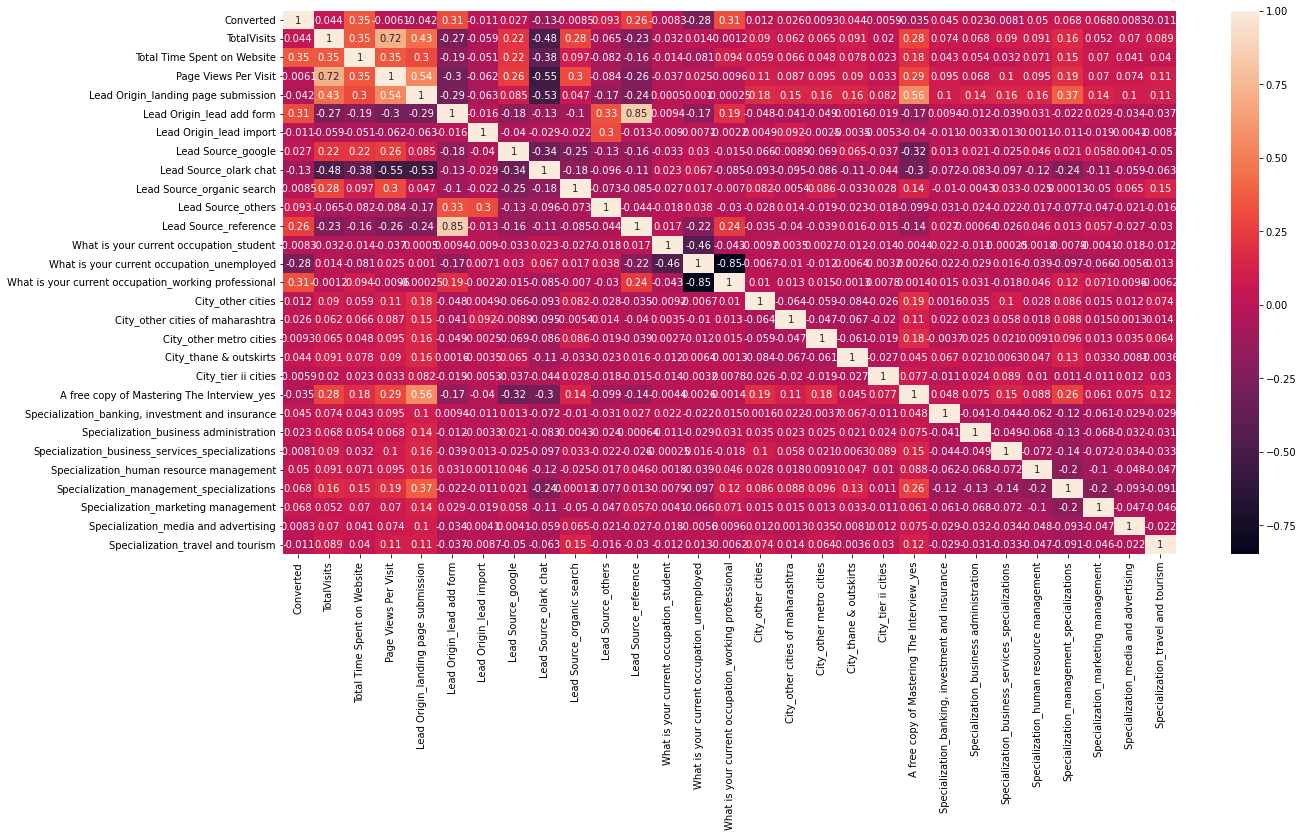

In [126]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [127]:
#X_test = X_test.drop(['What is your current occupation_unemployed'], 1)
#X_train = X_train.drop(['What is your current occupation_unemployed'], 1)

Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

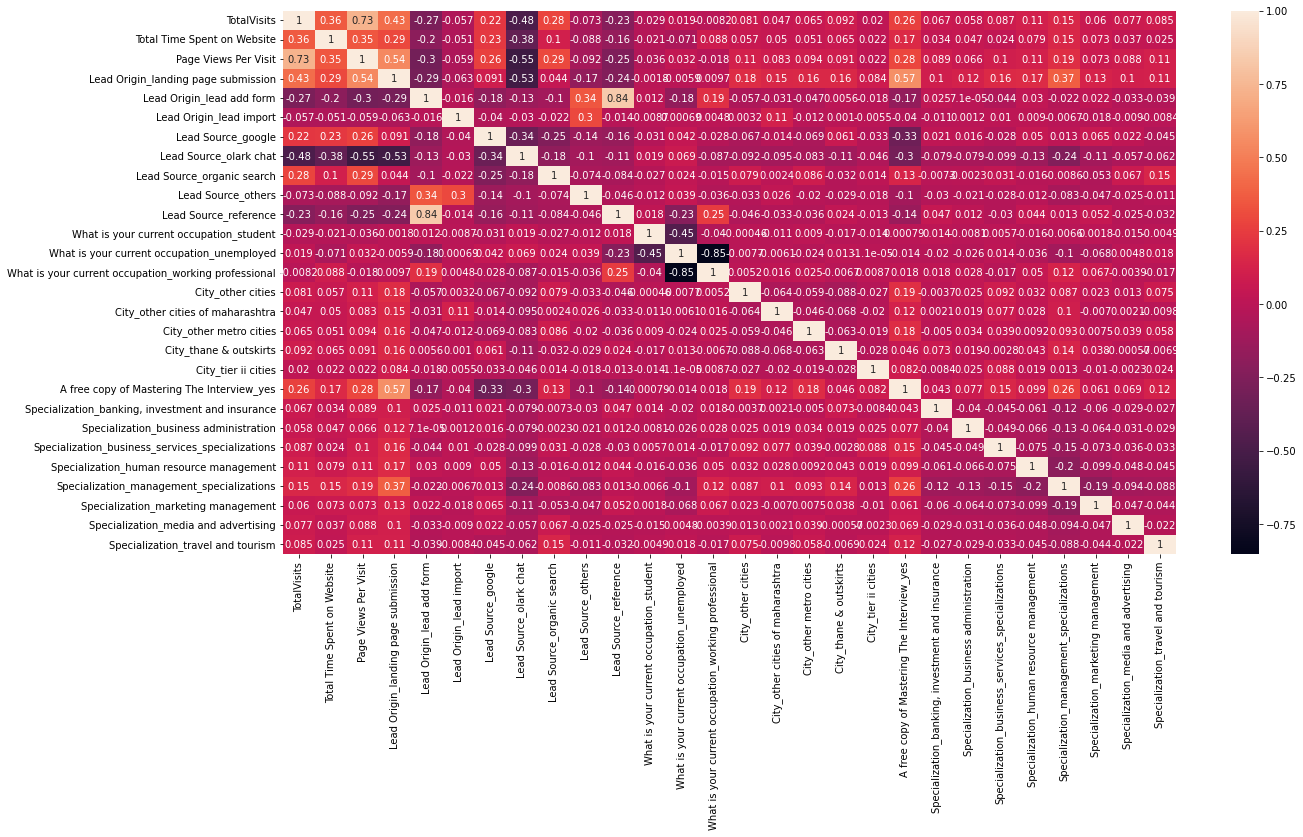

In [128]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

#### Model Building using Stats Model & RFE

In [129]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [130]:
loreg = LogisticRegression()
selector = RFE(loreg, 14)
selector = selector.fit(X_train, y_train)
selector.support_

array([False,  True, False,  True,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [131]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Lead Source_google',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_others', 'Lead Source_reference',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'City_other cities', 'City_other cities of maharashtra',
       'City_other metro cities', 'City_thane & outskirts',
       'City_tier ii cities', 'A free copy of Mastering The Interview_yes',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration',
       'Specialization_business_services_specializations',
       'Specialization_human resource management',
       'Specialization_management_specializations',
       'Specialization_marketing manage

In [132]:
list(zip(X_train.columns, selector.support_, selector.ranking_))
# Let's take a look at which features have been selected by RFE

[('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', True, 1),
 ('Lead Source_google', False, 5),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 6),
 ('Lead Source_others', False, 4),
 ('Lead Source_reference', False, 7),
 ('What is your current occupation_student', False, 3),
 ('What is your current occupation_unemployed', False, 2),
 ('What is your current occupation_working professional', True, 1),
 ('City_other cities', False, 10),
 ('City_other cities of maharashtra', False, 9),
 ('City_other metro cities', False, 11),
 ('City_thane & outskirts', False, 15),
 ('City_tier ii cities', False, 12),
 ('A free copy of Mastering The Interview_yes', False, 8),
 ('Specialization_banking, investment and insurance', True, 1),
 ('Specialization_business administration', True, 1),
 ('Speci

In [133]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[selector.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [134]:
# Select only the columns selected by RFE

X_train = X_train[col]

Assessing the model with StatsModels

In [135]:

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2966.0
Date:                Tue, 10 May 2022   Deviance:                       5931.9
Time:                        21:57:42   Pearson chi2:                 7.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3151      0.077    -17.046      0.000      -1.466      -1.164
Total Time Spent on Website                              1.0722      0.038     28.579      0.000       0.999       1.146
Lead Origin_landing page submission                     -0.9547      0.121     -7.897      0.000      -1.192      -0.718
Lead Origin_lead add form                                4.4376      0.239     18.567      0.000       3.969       4.906
Lead Origin_lead import                                  0.8731      0.502      1.739      0.082      -0.111       1.857
Lead Source_olark chat                                   0.7731      0.111      6.977      0.000       0.556       0.990
What is your current occupation_working professional     2.7340      0.193     14.155      0.000       2.355       3.113
Specialization_banking, investment and insurance         1.5242      0.200      7.634      0.000       1.133       1.916
Specialization_business administration                   1.0763      0.191      5.622      0.000       0.701       1.451
Specialization_business_services_specializations         1.1521      0.177      6.526      0.000       0.806       1.498
Specialization_human resource management                 1.1895      0.152      7.841      0.000       0.892       1.487
Specialization_management_specializations                1.0596      0.126      8.411      0.000       0.813       1.306
Specialization_marketing management                      1.2118      0.148      8.184      0.000       0.922       1.502
Specialization_media and advertising                     1.1153      0.233      4.787      0.000       0.659       1.572
Specialization_travel and tourism                        0.8292      0.254      3.266      0.001       0.332       1.327
========================================================================================================================
"""

As we can see that the p-value of variable Lead Origin_lead import is high, it must be dropped

In [136]:
col = col.drop('Lead Origin_lead import',1)

In [137]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2967.3
Date:                Tue, 10 May 2022   Deviance:                       5934.7
Time:                        21:57:42   Pearson chi2:                 7.05e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3014      0.077    -16.993      0.000      -1.451      -1.151
Total Time Spent on Website                              1.0667      0.037     28.580      0.000       0.994       1.140
Lead Origin_landing page submission                     -0.9823      0.120     -8.187      0.000      -1.217      -0.747
Lead Origin_lead add form                                4.4154      0.239     18.505      0.000       3.948       4.883
Lead Source_olark chat                                   0.7525      0.110      6.841      0.000       0.537       0.968
What is your current occupation_working professional     2.7356      0.193     14.168      0.000       2.357       3.114
Specialization_banking, investment and insurance         1.5371      0.200      7.702      0.000       1.146       1.928
Specialization_business administration                   1.0923      0.191      5.717      0.000       0.718       1.467
Specialization_business_services_specializations         1.1722      0.176      6.647      0.000       0.827       1.518
Specialization_human resource management                 1.2085      0.151      7.978      0.000       0.912       1.505
Specialization_management_specializations                1.0770      0.126      8.558      0.000       0.830       1.324
Specialization_marketing management                      1.2236      0.148      8.266      0.000       0.933       1.514
Specialization_media and advertising                     1.1290      0.233      4.849      0.000       0.673       1.585
Specialization_travel and tourism                        0.8438      0.254      3.326      0.001       0.346       1.341
========================================================================================================================
"""

As we can see that we have handled the P-Value very well. Now we can go ahead with the Train data predicted values

In [138]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.682382
4696    0.232367
3274    0.131061
2164    0.187497
1667    0.753618
7024    0.185541
8018    0.185541
778     0.131694
6942    0.185541
4440    0.173569
dtype: float64

In [139]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.68238164, 0.23236683, 0.13106124, 0.1874974 , 0.75361838,
       0.1855412 , 0.1855412 , 0.13169415, 0.1855412 , 0.17356941])

#### Creating a dataframe with the actual converted and the predicted probabilities

In [140]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.682382,9196
1,0,0.232367,4696
2,0,0.131061,3274
3,0,0.187497,2164
4,1,0.753618,1667


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [141]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.682382,9196,1
1,0,0.232367,4696,0
2,0,0.131061,3274,0
3,0,0.187497,2164,0
4,1,0.753618,1667,1


In [142]:
from sklearn import metrics

In [143]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3404  478]
 [ 927 1458]]


In [144]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7758097973512047


##### Checking VIFs

In [145]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_landing page submission,6.20
10,Specialization_management_specializations,3.69
9,Specialization_human resource management,1.86
11,Specialization_marketing management,1.72
8,Specialization_business_services_specializations,1.51
7,Specialization_business administration,1.39
2,Lead Origin_lead add form,1.37
6,"Specialization_banking, investment and insurance",1.32
0,Total Time Spent on Website,1.29
12,Specialization_media and advertising,1.22


VIF Value for lead origin_landing page submission variable seems high so we need to drop them because we can not predict from those 

In [147]:
col = col.drop('Lead Origin_landing page submission',1)
col

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_olark chat',
       'What is your current occupation_working professional',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration',
       'Specialization_business_services_specializations',
       'Specialization_human resource management',
       'Specialization_management_specializations',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Specialization_travel and tourism'],
      dtype='object')

In [148]:
# Let's re-run the model using the selected variables

In [149]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3001.6
Date:                Tue, 10 May 2022   Deviance:                       6003.2
Time:                        21:57:42   Pearson chi2:                 6.74e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5003      0.075    -20.053      0.000      -1.647      -1.354
Total Time Spent on Website                              1.0837      0.037     29.129      0.000       1.011       1.157
Lead Origin_lead add form                                4.8182      0.232     20.736      0.000       4.363       5.274
Lead Source_olark chat                                   1.0697      0.104     10.273      0.000       0.866       1.274
What is your current occupation_working professional     2.7697      0.190     14.581      0.000       2.397       3.142
Specialization_banking, investment and insurance         0.8601      0.179      4.809      0.000       0.510       1.211
Specialization_business administration                   0.4141      0.170      2.433      0.015       0.080       0.748
Specialization_business_services_specializations         0.4852      0.154      3.150      0.002       0.183       0.787
Specialization_human resource management                 0.5261      0.125      4.207      0.000       0.281       0.771
Specialization_management_specializations                0.3891      0.093      4.190      0.000       0.207       0.571
Specialization_marketing management                      0.6102      0.126      4.824      0.000       0.362       0.858
Specialization_media and advertising                     0.4419      0.217      2.039      0.041       0.017       0.867
Specialization_travel and tourism                        0.1335      0.236      0.566      0.571      -0.329       0.596
========================================================================================================================
"""

In [150]:
col = col.drop('Specialization_travel and tourism',1)
col

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_olark chat',
       'What is your current occupation_working professional',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration',
       'Specialization_business_services_specializations',
       'Specialization_human resource management',
       'Specialization_management_specializations',
       'Specialization_marketing management',
       'Specialization_media and advertising'],
      dtype='object')

In [151]:
# Let's re-run the model using the selected variables

In [152]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3001.7
Date:                Tue, 10 May 2022   Deviance:                       6003.5
Time:                        21:57:42   Pearson chi2:                 6.74e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4882      0.072    -20.792      0.000      -1.628      -1.348
Total Time Spent on Website                              1.0840      0.037     29.137      0.000       1.011       1.157
Lead Origin_lead add form                                4.8104      0.232     20.745      0.000       4.356       5.265
Lead Source_olark chat                                   1.0599      0.103     10.331      0.000       0.859       1.261
What is your current occupation_working professional     2.7725      0.190     14.599      0.000       2.400       3.145
Specialization_banking, investment and insurance         0.8484      0.178      4.777      0.000       0.500       1.196
Specialization_business administration                   0.4025      0.169      2.382      0.017       0.071       0.734
Specialization_business_services_specializations         0.4733      0.153      3.103      0.002       0.174       0.772
Specialization_human resource management                 0.5143      0.123      4.173      0.000       0.273       0.756
Specialization_management_specializations                0.3773      0.090      4.173      0.000       0.200       0.555
Specialization_marketing management                      0.5987      0.125      4.797      0.000       0.354       0.843
Specialization_media and advertising                     0.4301      0.216      1.994      0.046       0.007       0.853
========================================================================================================================
"""

In [153]:
# Getting the Predicted values on the train set
#y_train_pred = res.predict(X_train_sm)
#y_train_pred[:10]

In [154]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.70942378, 0.24991468, 0.14100441, 0.16031624, 0.56299396,
       0.20200486, 0.20200486, 0.14286102, 0.20200486, 0.18686401])

In [155]:

y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.682382,9196,1
1,0,0.232367,4696,0
2,0,0.131061,3274,0
3,0,0.187497,2164,0
4,1,0.753618,1667,1


In [156]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.682382,9196,1
1,0,0.232367,4696,0
2,0,0.131061,3274,0
3,0,0.187497,2164,0
4,1,0.753618,1667,1


In [157]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7758097973512047


### Let's now check the VIFs again

In [158]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.28
3,What is your current occupation_working profes...,1.18
1,Lead Origin_lead add form,1.17
2,Lead Source_olark chat,1.17
8,Specialization_management_specializations,1.11
7,Specialization_human resource management,1.04
9,Specialization_marketing management,1.04
4,"Specialization_banking, investment and insurance",1.01
5,Specialization_business administration,1.01
6,Specialization_business_services_specializations,1.00


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [159]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3404  478]
 [ 927 1458]]


In [160]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7758097973512047


## Metrics beyond simply accuracy

In [161]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6113207547169811

In [163]:
# Let us calculate specificity
TN / float(TN+FP)

0.8768675940236991

In [164]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12313240597630087


In [165]:
# positive predictive value 
print (TP / float(TP+FP))

0.753099173553719


In [166]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7859616716693604


In [167]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7758097973512047


In [168]:
#Calculate the sensitivity

TP/(TP+FN)

0.6113207547169811

## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [169]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [170]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

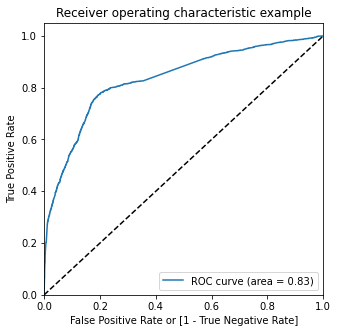

In [171]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

###  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [172]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.682382,9196,1,1,1,1,1,1,1,1,0,0,0
1,0,0.232367,4696,0,1,1,1,0,0,0,0,0,0,0
2,0,0.131061,3274,0,1,1,0,0,0,0,0,0,0,0
3,0,0.187497,2164,0,1,1,0,0,0,0,0,0,0,0
4,1,0.753618,1667,1,1,1,1,1,1,1,1,1,0,0


In [173]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.396043  0.995388  0.027821
0.2   0.2  0.738631  0.819706  0.688820
0.3   0.3  0.791128  0.774423  0.801391
0.4   0.4  0.791926  0.716981  0.837970
0.5   0.5  0.775810  0.611321  0.876868
0.6   0.6  0.763683  0.516981  0.915250
0.7   0.7  0.748364  0.413417  0.954147
0.8   0.8  0.729855  0.328302  0.976558
0.9   0.9  0.692197  0.203354  0.992530


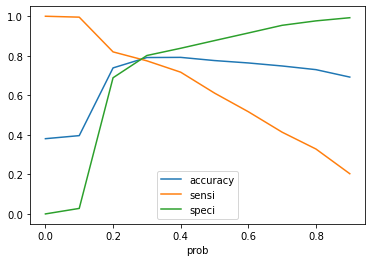

In [174]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.¶

In [175]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.682382,9196,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.232367,4696,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.131061,3274,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.187497,2164,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.753618,1667,1,1,1,1,1,1,1,1,1,0,0,1


In [176]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.682382,9196,1,68
1,0,0.232367,4696,0,23
2,0,0.131061,3274,0,13
3,0,0.187497,2164,0,19
4,1,0.753618,1667,1,75


In [177]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7919259613850327

In [178]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3253,  629],
       [ 675, 1710]], dtype=int64)

In [179]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [180]:
# Calculate Sensitivity

TP/(TP+FN)

0.7169811320754716

In [181]:
# Calculate Specificity

TN/(TN+FP)

0.8379701184956209

In [182]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.1620298815043792


In [183]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7310816588285592


In [184]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8281568228105907


## Precision and Recall

In [185]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3253,  629],
       [ 675, 1710]], dtype=int64)

In [186]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7310816588285592

In [187]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7169811320754716

Using sklearn utilities for the same

In [188]:
from sklearn.metrics import precision_score, recall_score


In [189]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7310816588285592

In [190]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7169811320754716

### Precision and recall tradeoff

In [191]:
from sklearn.metrics import precision_recall_curve

In [192]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

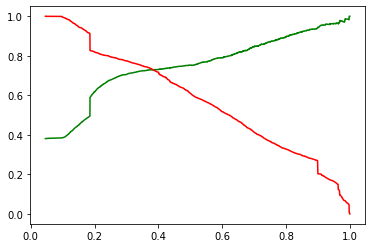

In [193]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##  Making predictions on the test set

In [194]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others,...,City_tier ii cities,A free copy of Mastering The Interview_yes,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_business_services_specializations,Specialization_human resource management,Specialization_management_specializations,Specialization_marketing management,Specialization_media and advertising,Specialization_travel and tourism
7681,5.0,311,2.5,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
984,3.0,183,3.0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
8135,2.0,913,2.0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
6915,4.0,141,2.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2712,3.0,252,3.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:


X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])



In [196]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,What is your current occupation_working professional,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_business_services_specializations,Specialization_human resource management,Specialization_management_specializations,Specialization_marketing management,Specialization_media and advertising
7681,-0.311318,0,0,0,0,0,0,1,0,0,0
984,-0.550262,0,0,0,0,0,0,0,1,0,0
8135,0.812462,0,0,0,0,1,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,1,0,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0


In [197]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [198]:
y_test_pred = res.predict(X_test_sm)

In [199]:
y_test_pred[:10]

7681    0.212254
984     0.153505
8135    0.448935
6915    0.142783
2712    0.125091
244     0.222182
4698    0.123963
8287    0.198584
6791    0.316184
8970    0.141435
dtype: float64

In [200]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [201]:
# Let's see the head
y_pred_1.head()

,0
7681,0.212254
984,0.153505
8135,0.448935
6915,0.142783
2712,0.125091


In [202]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [203]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [204]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [205]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [206]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.212254
1,0,984,0.153505
2,0,8135,0.448935
3,0,6915,0.142783
4,1,2712,0.125091


In [207]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [208]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.212254
1,0,984,0.153505
2,0,8135,0.448935
3,0,6915,0.142783
4,1,2712,0.125091


In [209]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [210]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [211]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.212254,21,0
1,984,0,0.153505,15,0
2,8135,0,0.448935,45,1
3,6915,0,0.142783,14,0
4,2712,1,0.125091,13,0


In [212]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7963514519731943

In [213]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1368,  308],
       [ 239,  771]], dtype=int64)

In [214]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [215]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7633663366336634

In [216]:
# Let us calculate specificity
TN / float(TN+FP)

0.8162291169451074

In [217]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7145505097312326

In [218]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7633663366336634

Final Observation: Let us compare the values obtained for Train & Test:

Train Data: Accuracy : 79.19% Sensitivity : 71.69% Specificity : 83.79% Test Data: Accuracy : 79.63% Sensitivity : 76.33% Specificity : 81.62% The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model